<a href="https://colab.research.google.com/github/tranquocdienspkt/AIspkt/blob/main/CNN_monan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import  to_categorical
from keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.image import imread

from os import listdir

from numpy import asarray
from numpy import save
import numpy as np

folder = '/content/drive/MyDrive/Fictures/Ảnh đồ ăn 30x40 pixel/'
photos, labels = list(), list()
for afile in listdir(folder):
  if afile.startswith("banhcanh"):
    output = 1.0
  if afile.startswith("banhkhot"):
    output = 2.0
  if afile.startswith("banhmi"):
    output = 3.0
  if afile.startswith("banhxeo"):
    output = 4.0
  if afile.startswith("bokho"):
    output = 5.0
  if afile.startswith("bunbo"):
    output = 5.0
  if afile.startswith("che"):
    output = 6.0
  if afile.startswith("comtam"):
    output = 7.0
  if afile.startswith("hutieu"):
    output = 8.0
  if afile.startswith("pho"):
    output = 9.0
  if afile.startswith("bokho"):
    output = 10.0
  img = load_img(folder + afile, target_size=(120,120))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

x_train = photos.reshape(300,120,120,3)
x_train = x_train.astype('float32')/255

y_train = to_categorical(labels,11)

print(x_train.shape)
print(y_train.shape)


(300, 120, 120, 3)
(300, 11)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (120,120,3), padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64,(3,3), activation='relu', padding= 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(128,(3,3), activation='relu', padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(11,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 dropout_4 (Dropout)         (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [ ]:
from keras.losses import categorical_crossentropy

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 20, batch_size = 64)

Epoch 1/20
5/5 [==============================] - 0s 59ms/step - loss: 0.0682 - accuracy: 0.9900
Epoch 2/20
5/5 [==============================] - 0s 52ms/step - loss: 0.0658 - accuracy: 0.9800
Epoch 3/20
5/5 [==============================] - 0s 51ms/step - loss: 0.0399 - accuracy: 0.9933
Epoch 4/20
5/5 [==============================] - 0s 50ms/step - loss: 0.0417 - accuracy: 0.9867
Epoch 5/20
5/5 [==============================] - 0s 50ms/step - loss: 0.0516 - accuracy: 0.9767
Epoch 6/20
5/5 [==============================] - 0s 53ms/step - loss: 0.0487 - accuracy: 0.9867
Epoch 7/20
5/5 [==============================] - 0s 53ms/step - loss: 0.1074 - accuracy: 0.9633
Epoch 8/20
5/5 [==============================] - 0s 55ms/step - loss: 0.0901 - accuracy: 0.9733
Epoch 9/20
5/5 [==============================] - 0s 51ms/step - loss: 0.0957 - accuracy: 0.9633
Epoch 10/20
5/5 [==============================] - 0s 51ms/step - loss: 0.0713 - accuracy: 0.9733
Epoch 11/20
5/5 [============

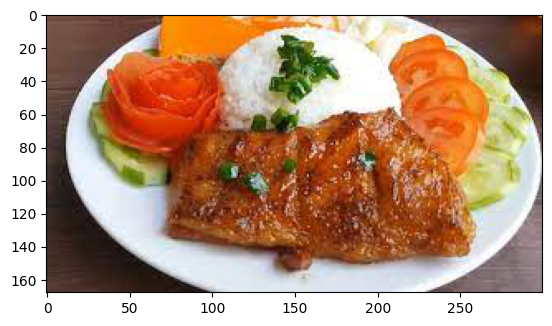

1/1 [==============================] - 0s 32ms/step


array([7])

In [ ]:
img_url = '/content/drive/MyDrive/Fictures/download (2).jpg'
img = plt.imread(img_url)
plt.imshow(img)
plt.show()

x_test = []

img_test = load_img(img_url, target_size=(120,120))
img_test = img_to_array(img_test)
x_test.append(img_test)

x_test = asarray(x_test)

x_test = x_test.reshape(1,120,120,3)
x_test = x_test.astype('float32')/255

np.argmax(model.predict(x_test), axis = -1)